<a href="https://www.kaggle.com/jahnvisikligar/online-retail?scriptVersionId=90325705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ii-uci/online_retail_II.csv


> # Reading CSV file

In [2]:
#reading CSV file
df = pd.read_csv("../input/online-retail-ii-uci/online_retail_II.csv")

> # Exploratory Data Analysis

> ****In this step we doing the basic exploration of data and cleaning of it as well.****

In [3]:
#computing shape
df.shape

(1067371, 8)

In [4]:
#checking for columns in CSV
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
#checking for head of CSV
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
#checking for tail of CSV
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [7]:
#sample of 5
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
504527,536544,22479,DAISY GARDEN MARKER,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
543072,537770,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-08 12:24:00,0.85,15529.0,United Kingdom
802532,561091,21989,PACK OF 20 SKULL PAPER NAPKINS,2,2011-07-25 09:55:00,1.63,NaN,United Kingdom
102619,499226,85065,CREAM SWEETHEART TRAYS,1,2010-02-25 11:49:00,12.75,13148.0,United Kingdom
992171,576329,22375,AIRLINE BAG VINTAGE JET SET BROWN,2,2011-11-14 15:22:00,8.29,NaN,United Kingdom


In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [9]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['Invoice'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(df['Customer ID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  53628
Number of products:  5305
Number of customers: 5942
Percentage of customers NA:  22.77 %
Number of countries:  43


In [10]:
#removing duplicates
print("Number of transactions before duplicates removal : %d " % df.shape[0])
# Dropping the duplicated transactions
df = df.drop(index=df[df.duplicated()].index)
print("Number of transactions after duplicates removal  : %d " % df.shape[0])

Number of transactions before duplicates removal : 1067371 
Number of transactions after duplicates removal  : 1033036 


In [11]:
#dropping quantities with NA values
df.dropna(inplace=True)
#df.drop(index = df[df['Quantity'] <= 0].index)
df = df.reset_index(drop=True)
df.dropna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
797881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
797882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
797883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


>  ****Verification of dimensions of data after removing NA values****

In [12]:
df.shape

(797885, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 48.7+ MB


In [14]:
df["Country"].value_counts()

United Kingdom          716115
Germany                  17339
EIRE                     16014
France                   13897
Netherlands               5137
Spain                     3754
Belgium                   3110
Switzerland               3058
Portugal                  2414
Australia                 1890
Channel Islands           1646
Italy                     1507
Sweden                    1343
Norway                    1308
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    797
Greece                     663
Japan                      565
USA                        535
Poland                     527
Unspecified                521
United Arab Emirates       386
Singapore                  346
Israel                     321
Malta                      299
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94
Thailand

In [15]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['Invoice'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(df['Customer ID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  44876
Number of products:  4646
Number of customers: 5942
Percentage of customers NA:  0.0 %
Number of countries:  41


In [16]:
df.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df.corr()

,Quantity,Price,Customer ID
Quantity,1.000000,-0.001918,-0.005171
Price,-0.001918,1.000000,-0.003789
Customer ID,-0.005171,-0.003789,1.000000


<AxesSubplot:>

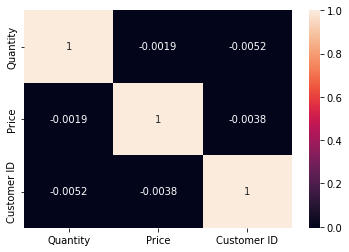

In [18]:
sns.heatmap(df.corr(), annot=True)

> ****Checking for cancelled orders****

In [19]:
#get cancelled transactions
cancelled_orders = df[df['Invoice'].astype(str).str.contains('C')]
cancelled_orders

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
797439,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
797523,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
797690,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
797691,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [20]:
#computing the number of cancelled transactions
print("We have",len(cancelled_orders),"cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = df['Invoice'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders cancelled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have 18390 cancelled orders.
Percentage of orders cancelled: 18390/44876 (40.98%) 


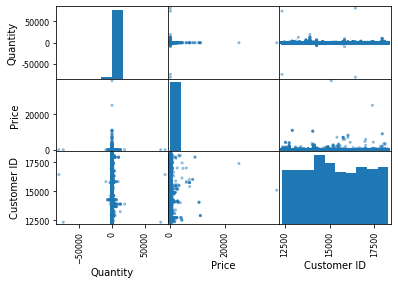

In [21]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df)

> # Sales per country

> ****Following points are covered:****
> * Total sales for product lines
> * Visual representation of Total sales of products Countrywise
> * Visual representation of Quantity of products sold in each Country**


In [22]:
#computing sales of each entry in data
#adding new column of Total sales in the dataframe
#checking for addition of new column in the dataframe
df['Total_sales'] = df['Quantity'] * df['Price']
df.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


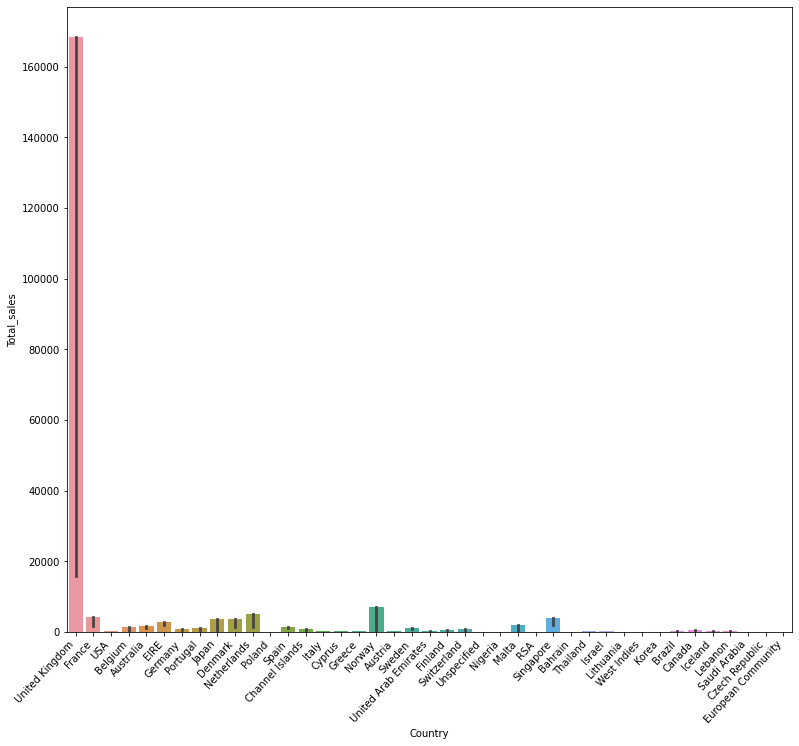

In [23]:
#bar graph to visualize the total sales occured per country

fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Total_sales',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

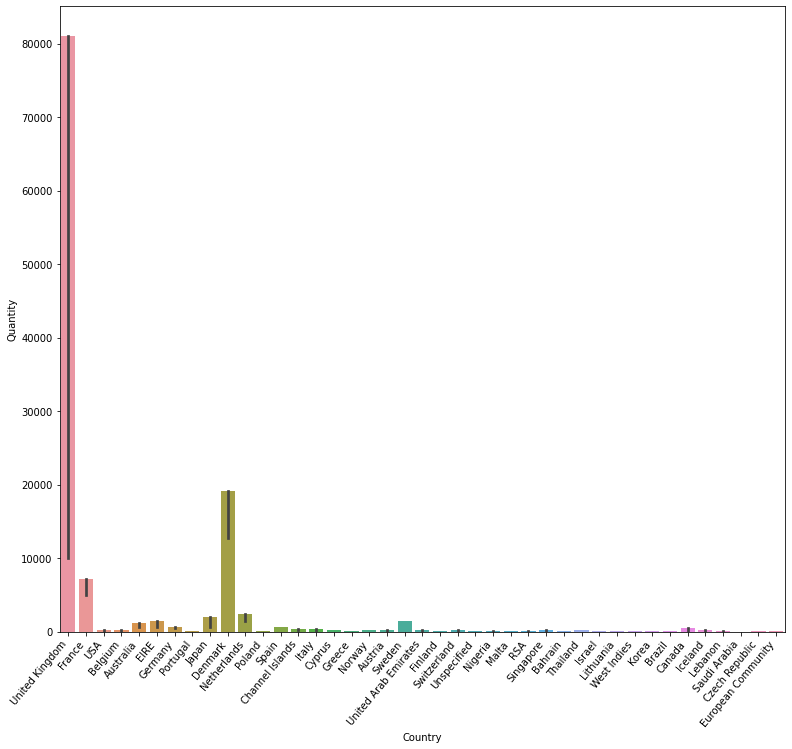

In [24]:
#bar graph to visualize the Quantity sold per Country
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Quantity',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

> # Case study on UK

> ****Further opportunities of target market:****
> * As it can be seen from the bar graphs that UK has had maximum Total sales and Quantity of products sold. 
> * It can be concluded that major sale market is UK. 
> * Further exploration of data for UK region can be done to analyse the most bought product in UK. 
> * Eventually, this answers our first business question - Future opportunities in a particular market.

In [25]:
#checking of unique values of Customers for UK 
df[df['Country']=='United Kingdom']['Customer ID'].nunique()

5410

In [26]:
sales_uk = df[df['Country']=='United Kingdom']
sales_uk.describe()

,Quantity,Price,Customer ID,Total_sales
count,716115.000000,716115.000000,716115.000000,716115.000000
mean,11.442740,3.480462,15545.327850,18.827290
std,193.223234,70.893157,1592.771841,328.669454
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,14191.000000,4.130000
50%,4.000000,1.950000,15544.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [27]:
print("Number of transactions: ", sales_uk['Invoice'].nunique())
print("Number of products bought: ",sales_uk['StockCode'].nunique())
print("Number of customers:", sales_uk['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(sales_uk['Customer ID'].isnull().sum() * 100 / len(sales_uk),2),"%" )
print('Number of countries: ',sales_uk['Country'].nunique())

Number of transactions:  40505
Number of products bought:  4631
Number of customers: 5410
Percentage of customers NA:  0.0 %
Number of countries:  1


In [28]:
#checking for most bought product in UK
groupedProduct = sales_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
3413,84077,95056
4058,85099B,83115
4080,85123A,80937
3820,84879,72098
1405,22197,70235
108,17003,69011
600,21212,65639
1218,21977,44821
3939,84991,39866
16,15036,35613
